In [1]:
# Install if needed
!pip install folium plotly

# Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import folium
import plotly.express as px

# Set style
sns.set(style="darkgrid")


In [8]:
from google.colab import files
uploaded = files.upload()


Saving US_Accidents_March23.zip to US_Accidents_March23.zip


In [13]:
import zipfile

with zipfile.ZipFile('US_Accidents_March23.zip', 'r') as zip_ref:
    zip_ref.extractall()


In [3]:
import pandas as pd

df = pd.read_csv('US_Accidents_March23.csv')

df.head()  # Check the first few rows


,ID,Source,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),...,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,A-1,Source2,3,2016-02-08 05:46:00,2016-02-08 11:00:00,39.865147,-84.058723,NaN,NaN,0.01,...,False,False,False,False,False,False,Night,Night,Night,Night
1,A-2,Source2,2,2016-02-08 06:07:59,2016-02-08 06:37:59,39.928059,-82.831184,NaN,NaN,0.01,...,False,False,False,False,False,False,Night,Night,Night,Day
2,A-3,Source2,2,2016-02-08 06:49:27,2016-02-08 07:19:27,39.063148,-84.032608,NaN,NaN,0.01,...,False,False,False,False,True,False,Night,Night,Day,Day
3,A-4,Source2,3,2016-02-08 07:23:34,2016-02-08 07:53:34,39.747753,-84.205582,NaN,NaN,0.01,...,False,False,False,False,False,False,Night,Day,Day,Day
4,A-5,Source2,2,2016-02-08 07:39:07,2016-02-08 08:09:07,39.627781,-84.188354,NaN,NaN,0.01,...,False,False,False,False,True,False,Day,Day,Day,Day


In [4]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8983 entries, 0 to 8982
Data columns (total 46 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   ID                     8983 non-null   object 
 1   Source                 8983 non-null   object 
 2   Severity               8983 non-null   int64  
 3   Start_Time             8983 non-null   object 
 4   End_Time               8983 non-null   object 
 5   Start_Lat              8983 non-null   float64
 6   Start_Lng              8983 non-null   float64
 7   End_Lat                0 non-null      float64
 8   End_Lng                0 non-null      float64
 9   Distance(mi)           8983 non-null   float64
 10  Description            8982 non-null   object 
 11  Street                 8982 non-null   object 
 12  City                   8982 non-null   object 
 13  County                 8982 non-null   object 
 14  State                  8982 non-null   object 
 15  Zipc

In [5]:
df.isnull().sum().sort_values(ascending=False)


,0
End_Lng,8983
End_Lat,8983
Precipitation(in),8160
Wind_Chill(F),7866
Wind_Speed(mph),1598
Humidity(%),112
Visibility(mi),93
Temperature(F),83
Weather_Condition,76
Pressure(in),33


In [6]:
df.describe()


,Severity,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Speed(mph),Precipitation(in)
count,8983.000000,8983.000000,8983.000000,0.0,0.0,8983.000000,8900.000000,1117.000000,8871.000000,8950.000000,8890.000000,7385.000000,823.000000
mean,2.399087,38.144220,-118.726399,NaN,NaN,0.021192,61.083449,32.112981,62.199076,30.012858,9.009336,8.789479,0.026403
std,0.492458,0.762478,10.464849,NaN,NaN,0.415894,17.645833,10.923567,24.590721,0.332843,2.392786,4.437316,0.048718
min,1.000000,36.352592,-123.810753,NaN,NaN,0.000000,3.900000,-8.400000,8.000000,3.010000,0.200000,1.200000,0.000000
25%,2.000000,37.654999,-122.152355,NaN,NaN,0.000000,48.900000,26.400000,44.000000,29.900000,10.000000,5.800000,0.000000
50%,2.000000,37.962135,-121.871490,NaN,NaN,0.000000,57.900000,35.100000,64.000000,30.010000,10.000000,8.100000,0.010000
75%,3.000000,38.578369,-121.344704,NaN,NaN,0.010000,73.400000,40.600000,83.000000,30.130000,10.000000,11.500000,0.030000
max,4.000000,41.428753,-81.550728,NaN,NaN,24.040000,106.000000,66.000000,100.000000,30.620000,40.000000,31.100000,0.490000


In [7]:
df.isnull().sum().sort_values(ascending=False)


,0
End_Lng,8983
End_Lat,8983
Precipitation(in),8160
Wind_Chill(F),7866
Wind_Speed(mph),1598
Humidity(%),112
Visibility(mi),93
Temperature(F),83
Weather_Condition,76
Pressure(in),33


In [8]:
df['Start_Time'] = pd.to_datetime(df['Start_Time'])


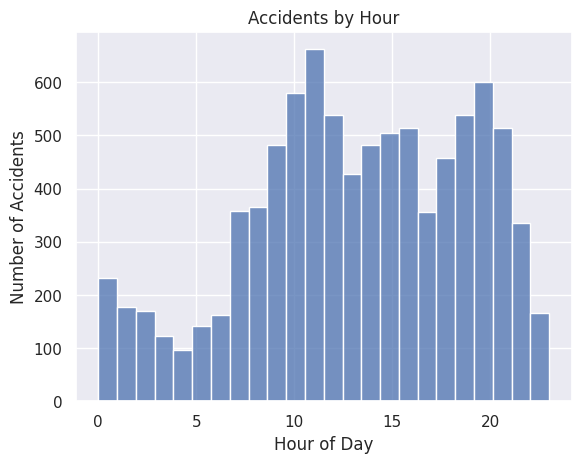

In [14]:
df['Hour'] = df['Start_Time'].dt.hour

import seaborn as sns
import matplotlib.pyplot as plt

sns.histplot(df['Hour'], bins=24)
plt.title("Accidents by Hour")
plt.xlabel("Hour of Day")
plt.ylabel("Number of Accidents")
plt.show()


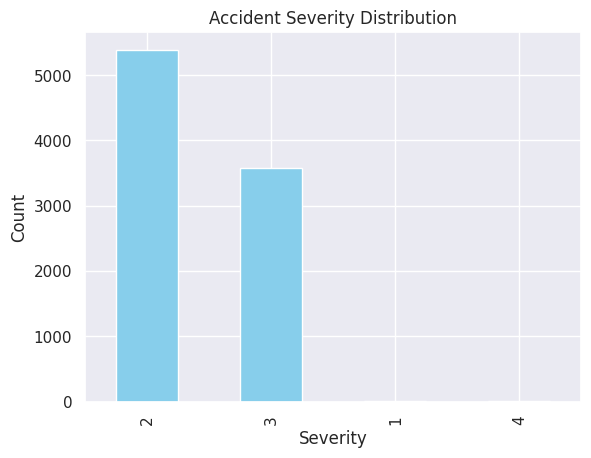

In [10]:
df['Severity'].value_counts().plot(kind='bar', color='skyblue')
plt.title("Accident Severity Distribution")
plt.xlabel("Severity")
plt.ylabel("Count")
plt.show()


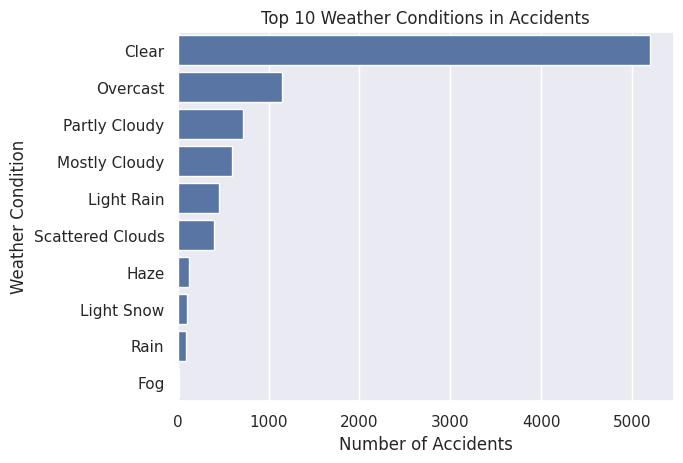

In [11]:
top_weather = df['Weather_Condition'].value_counts().head(10)
sns.barplot(y=top_weather.index, x=top_weather.values)
plt.title("Top 10 Weather Conditions in Accidents")
plt.xlabel("Number of Accidents")
plt.ylabel("Weather Condition")
plt.show()


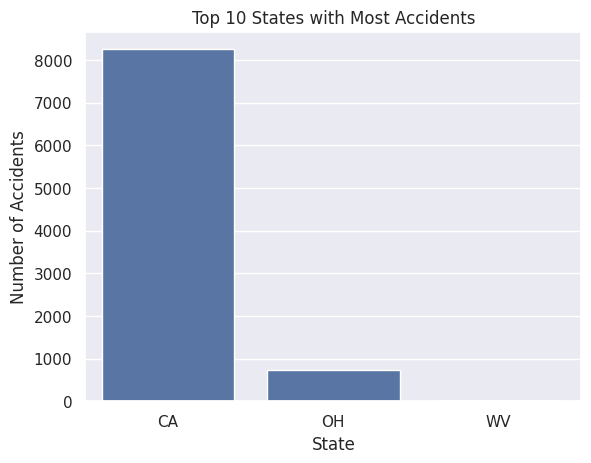

In [12]:
top_states = df['State'].value_counts().head(10)
sns.barplot(x=top_states.index, y=top_states.values)
plt.title("Top 10 States with Most Accidents")
plt.xlabel("State")
plt.ylabel("Number of Accidents")
plt.show()


📌 Task 4 Summary – Exploratory Data Analysis on Traffic Accident Data
In this task, we analyzed the US_Accidents_March23.csv dataset to identify patterns and insights related to traffic accidents in the US. The goal was to explore the data with respect to road conditions, weather, time of day, and severity.

🔍 Key Steps Performed:
Data Loading & Overview

Loaded the dataset using pandas.

Inspected the shape, column types, and summary statistics.

Missing Value Analysis

Identified columns with missing values.

Suggested handling strategies for heavily null columns.

Time-based Accident Patterns

Converted Start_Time to datetime format.

Analyzed accidents by hour to find peak times.

Severity Distribution

Plotted the distribution of accident severity levels (1 to 4).

Most accidents were of moderate severity (Level 2 and 3).

Weather Conditions

Investigated the top weather conditions during accidents.

Clear and overcast weather were the most common.

State-wise Accidents

Found the top 10 states with the highest number of accidents.

California and Florida had the most incidents.

📊 Tools Used:
pandas for data manipulation

matplotlib and seaborn for visualizations